In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [26]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [27]:
NUM_CLASSES = 9

In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Dataset reading

In [29]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [30]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    '''
    Build your model there
    '''
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [35]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [36]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.1406 - loss: 2.3246
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1285 - loss: 2.3291 - val_accuracy: 0.2015 - val_loss: 2.2022
Epoch 2/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1406 - loss: 2.2460
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1574 - loss: 2.2191 - val_accuracy: 0.2112 - val_loss: 2.1191
Epoch 3/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2031 - loss: 2.1803
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1805 - loss: 2.1687 - val_accuracy: 0.2282 - val_loss: 2.0634
Epoch 4/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2266 - loss: 2.0933
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [37]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0378 


In [38]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [39]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.8969325e-04 1.5419183e-12 2.7778333e-03 2.4427180e-10 3.3384974e-06
 9.8280644e-01 1.3992040e-02 2.3052259e-04 4.3592425e-11]
5


# Confusion matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


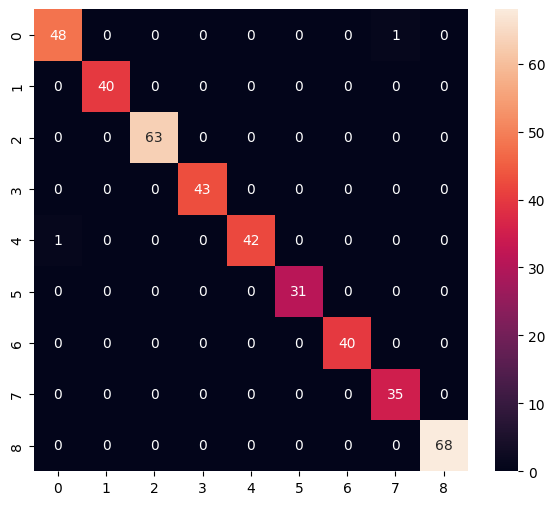

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        43
           4       1.00      0.98      0.99        43
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        40
           7       0.97      1.00      0.99        35
           8       1.00      1.00      1.00        68

    accuracy                           1.00       412
   macro avg       0.99      1.00      0.99       412
weighted avg       1.00      1.00      1.00       412



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [41]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [42]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpd3vx85z9/assets


INFO:tensorflow:Assets written to: /tmp/tmpd3vx85z9/assets


Saved artifact at '/tmp/tmpd3vx85z9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  130300184192656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130300184184592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130300184182864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130300184186704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130300184185936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130300184185744: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1745872893.977321    8071 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745872893.977331    8071 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-28 23:41:33.977506: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpd3vx85z9
2025-04-28 23:41:33.977788: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-28 23:41:33.977792: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpd3vx85z9
I0000 00:00:1745872893.980183    8071 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-28 23:41:33.980545: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-28 23:41:33.994956: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpd3vx85z9
2025-04-28 23:41:33.998547: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

6776